#Convolutional Neural Network

# import library and helpers

In [23]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import cv2
from PIL import Image
import scipy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, LSTM
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Reshape

## import helpers

In [24]:
'''
Load imags using mping function and return all data list
'''

def load_data_set(path, imag_indices, test=False):
    imgs = []
    print ('Loading {} satlite images...'.format(len(imag_indices)), end='') # for checking
    
    if not test:  #for training feature and groundtruth dataset
        for i in imag_indices:
            imag_name = path + 'satImage_{:03d}.png'.format(i) # the imag name format
            if os.path.isfile(imag_name):
                img = mpimg.imread(imag_name)   # read all imags in the file
                imgs.append(img)
            else:
                print('imag {} does not exists'.format(imag_name)) # for checking wrongly path
    
    else:  # for test dataset
        for i in imag_indices:
            imag_path = path + 'test_{:01d}/'.format(i)
            imag_name = imag_path + 'test_{:01d}.png'.format(i)
            if os.path.isfile(imag_name):
                imag = mpimg.imread(imag_name)
                imgs.append(imag)
            else:
                print('imag {} does not exists'.format(imag_name))
    return imgs

# get patch set
def patch_set_3d(im, w, h, pad):
    patch_set_3d = []
    imgwidth = im.shape[0] - pad
    imgheight = im.shape[1] - pad

    for i in range(pad,imgheight,h): # loop across height in steps equal to your height patch size
        for j in range(pad,imgwidth,w): # loop across height in steps equal to your hweight patch size
            im_patch_3d = im[j-pad:j+w+pad, i-pad:i+h+pad, :]
            patch_set_3d.append(im_patch_3d)
    return patch_set_3d


def patch_set_2d(im, w, h):
    patch_set_2d = []
    width = im.shape[0] 
    height = im.shape[1] 
    for i in range(0, height, h):
        for j in range(0,width,w):
            im_patch_2d = im[j:j+w, i:i+h].flatten() # for background 2d picture
            patch_set_2d.append(im_patch_2d)
    return patch_set_2d


def array_to_patches(array, patch_size):
    patches = []
    for i in range(len(array)):
        patches.append(array[i].reshape((patch_size,patch_size)))
    return patches


def label_to_img(width, height, w, h, labels): #produce a binary pic from label
    im = np.ones([width, height])
    idx = 0
    for i in range(0,height,h):
        for j in range(0,width,w):
            im[j:j+w, i:i+h] = labels[idx] 
            idx = idx + 1
    return im

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img
    
def get_prediction_pic(X): #get predicition from saved weight
    prediction = cnn.predict(X, batch_size=32)
    patches_test = array_to_patches(np.where(prediction > 0.5, 1, 0), patch_size)
    array_test = np.asarray(patches_test)
    predicted_im = label_to_img(608, 608, patch_size, patch_size, array_test)
    img_array = img_to_array(predicted_im)
    return img_array


## from helpers "mask to submission"

In [26]:
#!/usr/bin/env python3

import os
import numpy as np
import matplotlib.image as mpimg
import re

foreground_threshold = 0.25 

# assign a label to a patch
def patch_to_label(patch):
    df = np.mean(patch)
    if df > foreground_threshold:
        return 1
    else:
        return 0

def mask_to_submission_strings(image_filename):
    """Reads a single image and outputs the strings that should go into the submission file"""
    img_number = int(re.search(r"\d+", image_filename).group(0))
    im = mpimg.imread(image_filename)
    patch_size = 16
    for j in range(0, im.shape[1], patch_size):
        for i in range(0, im.shape[0], patch_size):
            patch = im[i:i + patch_size, j:j + patch_size]
            label = patch_to_label(patch)
            yield("{:03d}_{}_{},{}".format(img_number, j, i, label))

def masks_to_submission(submission_filename, *image_filenames):
    """Converts images into a submission file"""
    with open(submission_filename, 'w') as f:
        f.write('id,prediction\n')
        for fn in image_filenames[0:]:
            f.writelines('{}\n'.format(s) for s in mask_to_submission_strings(fn))


if __name__ == '__main__':
    submission_filename = 'dummy_submission.csv'
    image_filenames = []
    for i in range(1, 51):
        image_filename = 'training/groundtruth/satImage_' + '%.3d' % i + '.png'
        print(image_filename)
        image_filenames.append(image_filename)
    masks_to_submission(submission_filename, *image_filenames)

/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_001.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_002.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_003.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_004.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_005.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_006.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_007.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_008.png
/content/drive/MyDrive/Colab Notebooks/road_segmentation-master/data/training/groundtruth/satImage_009.png
/content/drive/MyDrive/Colab Notebook

# Image loading

In [27]:
'''
Load imags using mping function and return all data list
'''
imag_indices = np.arange(1, 101)
test_indices = np.arange(1, 51)

imag_indices2 = np.arange(0, 100)
test_indices2 = np.arange(0, 50)

image_path = 'training/images/'
label_path = 'training/groundtruth/'
test_path = 'test_set_images/'

def load_data_set(path, imag_indices, test=False):
    imgs = []
    print ('Loading {} satlite images...'.format(len(imag_indices)), end='') # for checking
    
    if not test:  #for training feature and groundtruth dataset
        for i in imag_indices:
            imag_name = path + 'satImage_{:03d}.png'.format(i) # the imag name format
            if os.path.isfile(imag_name):
                img = mpimg.imread(imag_name)   # read all imags in the file
                imgs.append(img)
            else:
                print('imag {} does not exists'.format(imag_name)) # for checking wrongly path
    
    else:  # for test dataset
        for i in imag_indices:
            imag_name = path + 'satImage_{:03d}.png'.format(i)
            if os.path.isfile(imag_name):
                imag = mpimg.imread(imag_name)
                imgs.append(imag)
            else:
                print('imag {} does not exists'.format(imag_name))
    return imgs

train_images = load_data_set(image_path, imag_indices, test=False)
test_images = load_data_set(test_path, test_indices, test=True)
label_images = [mpimg.imread(label_path + os.listdir(image_path)[i]) for i in imag_indices2]



Loading 100 satlite images...Loading 50 satlite images...Image size = (400, 400, 3)
Image size = (408, 408, 3)
Image type <class 'numpy.ndarray'>


#  Reshape the input data into a format suitable for the convolutional layer

### Extract patches and data from input images

In [28]:
patch_size = 16 
pad = 4
images_pad = [np.pad(mpimg.imread(image_path + os.listdir(image_path)[i]), ((pad,pad),(pad,pad),(0,0)), 'constant') for i in imag_indices2]
image_patches = [patch_set_3d(images_pad[i], patch_size, patch_size, pad) for i in imag_indices2]
label_patches = [patch_set_2d(label_images[i], patch_size, patch_size) for i in imag_indices2]

X_train = np.asarray([image_patches[i][j] for i in range(len(image_patches)) for j in range(len(image_patches[i]))])
Y_train = np.asarray([label_patches[i][j] for i in range(len(label_patches)) for j in range(len(label_patches[i]))])

# Neural network model

#### Build the model using the Sequential.add() function and add layers

In [29]:
cnn = Sequential()
cnn.add(Convolution2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(Convolution2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(256, activation='sigmoid'))

### Choose an optimizer and the matrics is F1 

In [30]:
from keras import backend as K
import keras.optimizers

"""precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved.
"""
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
      
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)

cnn.compile(loss='binary_crossentropy',
          optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
          metrics=[f1])



### train

In [31]:
cnn.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.3865 - f1: 0.2076
Epoch 2/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.3037 - f1: 0.4990
Epoch 3/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2775 - f1: 0.5716
Epoch 4/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2588 - f1: 0.6184
Epoch 5/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2436 - f1: 0.6574
Epoch 6/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2326 - f1: 0.6810
Epoch 7/20
1954/1954 [==============================] - 9s 4ms/step - loss: 0.2253 - f1: 0.6968
Epoch 8/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2168 - f1: 0.7121
Epoch 9/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2101 - f1: 0.7256
Epoch 10/20
1954/1954 [==============================] - 8s 4ms/step - loss: 0.2045 - f1: 0.7374
Epoch 11/20
1954/1954 [================

#### Visualizing model performance

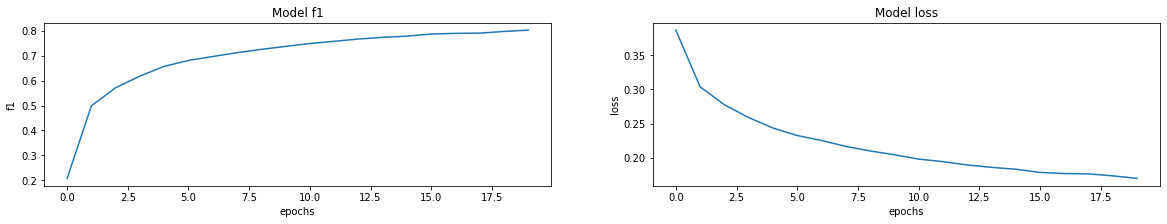

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["f1", "loss"]):
    ax[i].plot(cnn.history.history[metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)

#### Save weights 

In [33]:
cnn.save_weights("cnn.h5")
cnn.load_weights(/cnn.h5")

# create submission

### create prediction on X_test and save pictures

In [37]:
image_filenames = []
for i in test_indices:
    image_filenames.append('test/images/Image_' + '%.3d' % i + '.png')
    
images_test = [np.pad(mpimg.imread(image_filename), ((pad,pad),(pad,pad),(0,0)), 'constant') 
               for image_filename in image_filenames]

# get prediction from saved weights
for i in test_indices2:
    X_test = np.asarray(patch_set_3d(images_test[i], patch_size, patch_size, pad))
    img_array = get_prediction_pic(X_test)
    save_img('prediction/result_' + '%.3d' % (i + 1) + '.png', img_array)


### generate submissoin

In [36]:
submission_filename = 'submission.csv'
image_filenames = []
for i in test_indices:
    image_filename = 'prediction/result_' + '%.3d' % i + '.png'
    image_filenames.append(image_filename)
    
masks_to_submission(submission_filename, *image_filenames)